# 선형 회귀 모델
- 키, 몸무게, 성별 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams.update({'font.size': 13})

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score    

## 데이터 다운로드
- 키, 몸무게, 성별 데이터

In [21]:
## 키, 몸무게, 성별 데이터 다운로드

df = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height500.csv")
print(df.shape)
df[:5]

(1000, 3)


,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [22]:
print(df.Gender.value_counts())

Male      500
Female    500
Name: Gender, dtype: int64


## 데이터 특성

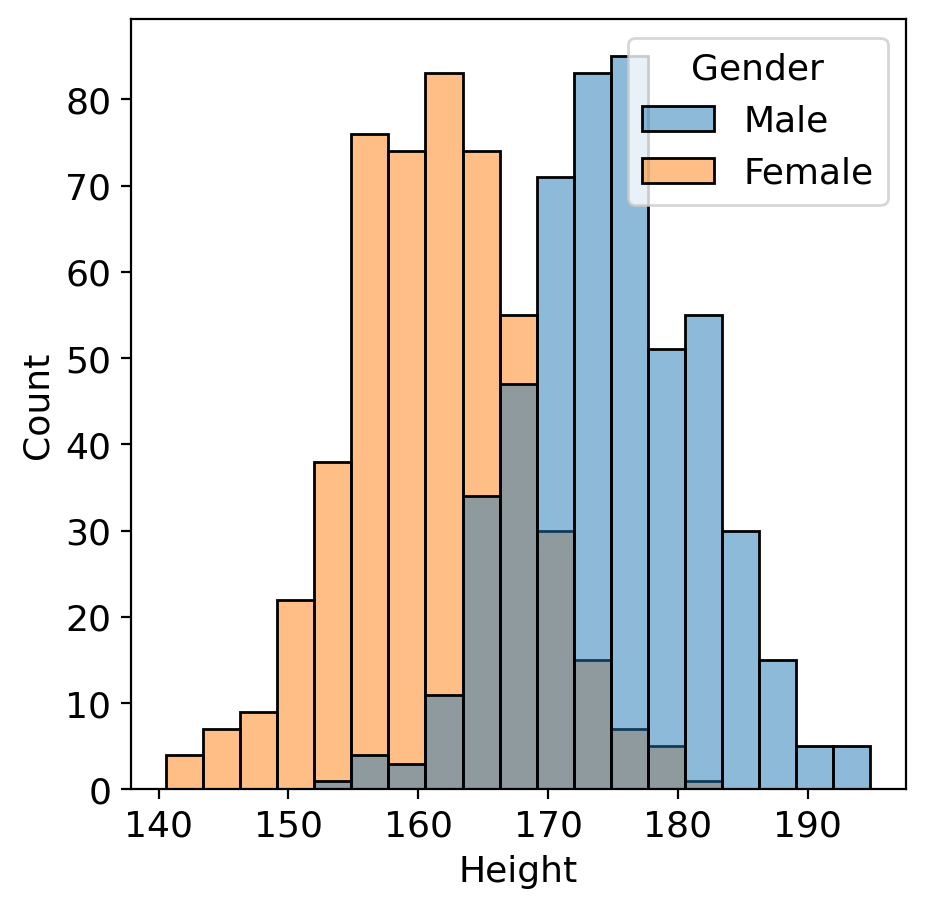

<Axes: xlabel='Weight', ylabel='Count'>

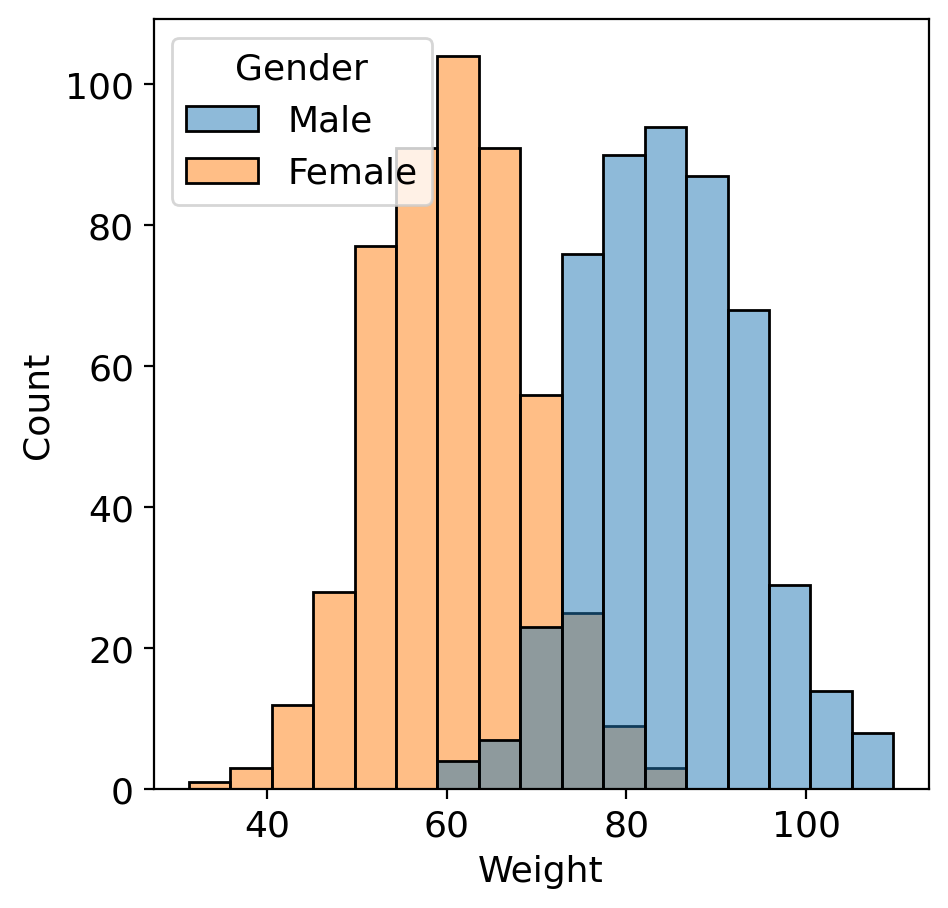

In [5]:
## 남여별 키와 몸무게 분포 보기

import seaborn as sns
sns.histplot(data=df, x='Height',hue='Gender')
plt.show()
sns.histplot(data=df, x='Weight',hue='Gender')

<Axes: xlabel='Height', ylabel='Weight'>

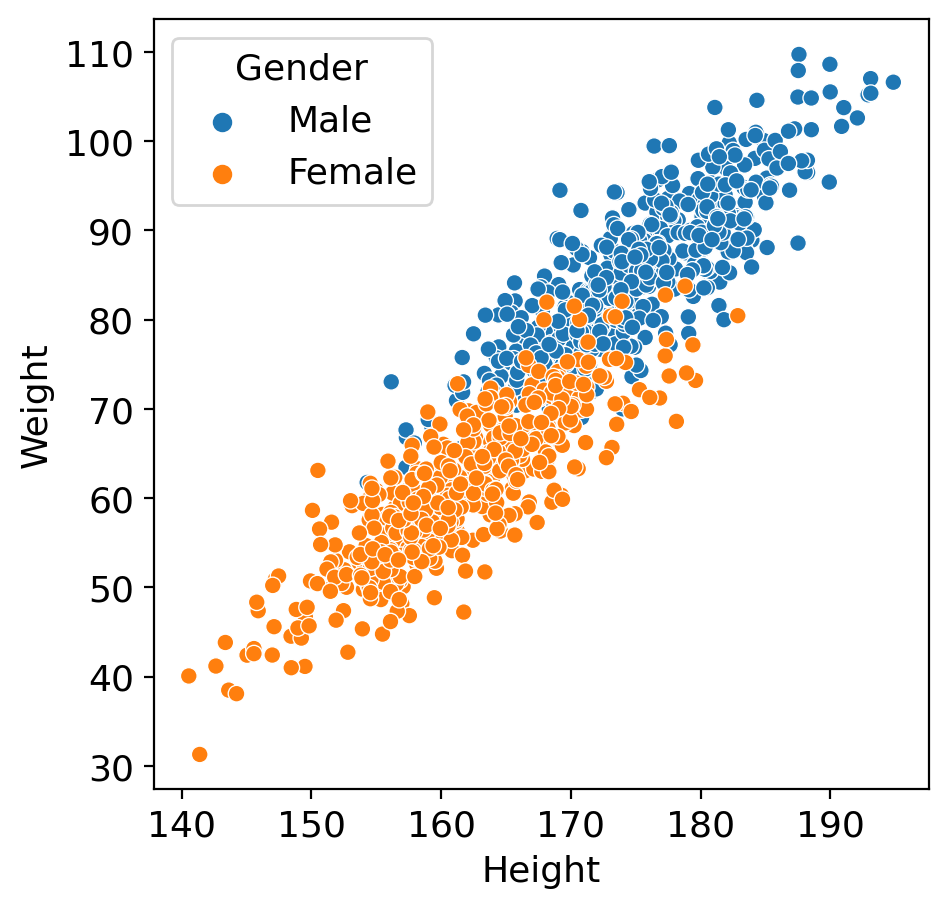

In [6]:
## 남여별 키와 몸무게 산포도

sns.scatterplot(data=df, x='Height', y='Weight', 
                hue='Gender')

# 선형회귀 모델 

## 모델 생성, 학습, 사용 절차
- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

## 훈련 및 검증 데이터 나누기

- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [7]:
df.Gender = df.Gender.map({'Male':1, 'Female':0})
df[:5]

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550
3,1,182.196685,99.809504
4,1,177.499761,93.598619


In [23]:
df.Gender = df.Gender.map({'Male':0, 'Female':1})
df[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [24]:
df2  = pd.get_dummies(df, columns=['Gender'])

In [25]:
df2.head()

,Height,Weight,Gender_0,Gender_1
0,187.571423,109.720985,1,0
1,174.706036,73.622732,1,0
2,188.239668,96.497550,1,0
3,182.196685,99.809504,1,0
4,177.499761,93.598619,1,0


In [8]:
## 키로부터 몸무게 예측하는 선형 모델

# X에 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다
X = df[['Height']]
y = df['Weight']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # (1) 모델 생성
model.fit(X_train, y_train) # (2) 학습
model.score(X_test, y_test) # (3) 성능 평가

0.847956497819632

In [9]:
X

,Height
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761
...,...
995,158.719611
996,165.896759
997,166.144075
998,167.182860


In [10]:
y.head()

0    109.720985
1     73.622732
2     96.497550
3     99.809504
4     93.598619
Name: Weight, dtype: float64

a= [1.41281217] , b= -164.78729317359364


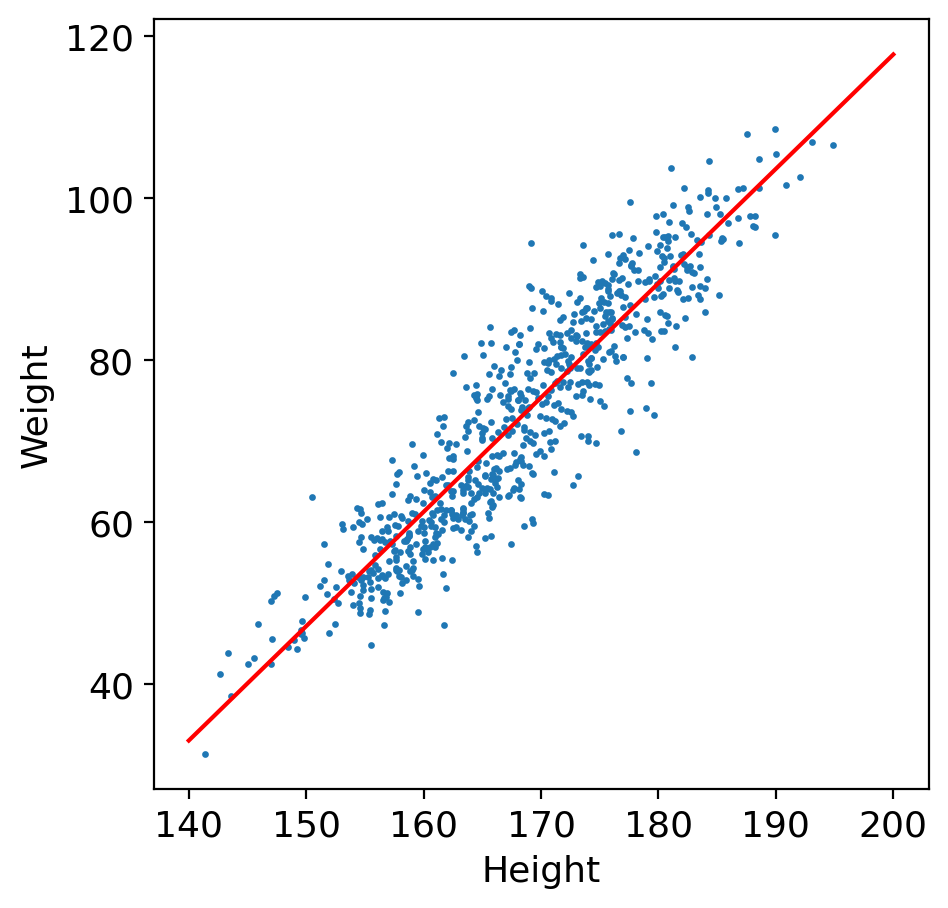

In [11]:
## 선형 회귀 직선 그리기


# 학습된 가중치(파라미터) 보기
a, b = model.coef_, model.intercept_
print('a=',a, ', b=',b)

# 회귀 직선 보기 (양 끝점 두개를 연결)
xs = np.linspace(140,200,2) # 키의 양 끝점 선택
ys = a*xs + b               # 모델이 예측하는 몸무게
plt.plot(xs,ys, c='r')      # 회귀직선 그리디

# 훈련 데이터의 산포도 보기
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(X_train.values, y_train, s=2)

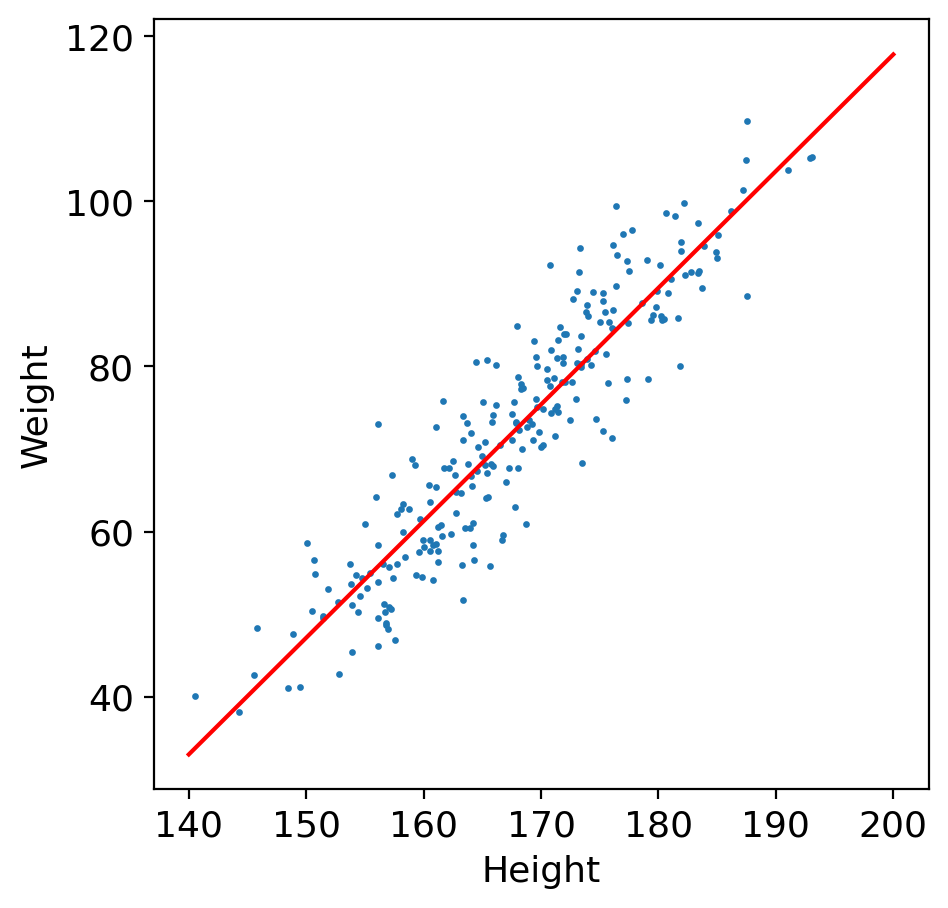

In [12]:
# 회귀 직선 보기 (양 끝점 두개를 연결)
xs = np.linspace(140,200,2) # 키의 양 끝점 선택
ys = a*xs + b               # 모델이 예측하는 몸무게
plt.plot(xs,ys, c='r')      # 회귀직선 그리디

# Test 데이터의 산포도 보기
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(X_test.values, y_test, s=2)

### 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [13]:
## 회귀모델의 여러가지 성능 평가 지표 

def show_reg_result(y_test,y_pred):
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))

# 예측값을 구한 후에 여러 성능 보기
y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

R-Squared:  0.848
Max Error:  17.213
Mean Absolute Error:  4.701
Root Mean Squared Error:  5.96


### 모델 사용
- 임의의 키 값에 대한 몸무게 계측 수행

In [14]:
model.predict(np.array([[160],[170],[180]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.26265465, 75.39077639, 89.51889813])

# 성별 정보 사용
- 추가정보를 사용함으로써 (즉, 입력 데이터의 컬럼 수를 늘임으로써) 성능이 개선되는지 확인

## 성별과 키, 두개의 컬럼을 사용
- 남여의 키-몸무게 관계가 구분되므로 추가 정보 사용으로 성능이 개선될 것으로 예상

In [15]:
## 입력으로 성별과 키 두개의 컬럼을 사용하는 경우

X = df[["Gender", "Height"]]
y = df.Weight

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test).round(4)

0.9154

- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [16]:
print(model.coef_)
print(model.intercept_)

[9.60493788 1.06340842]
-110.87906020243011


## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

a1, a2, b1 = [   9.605    1.063 -164.787]


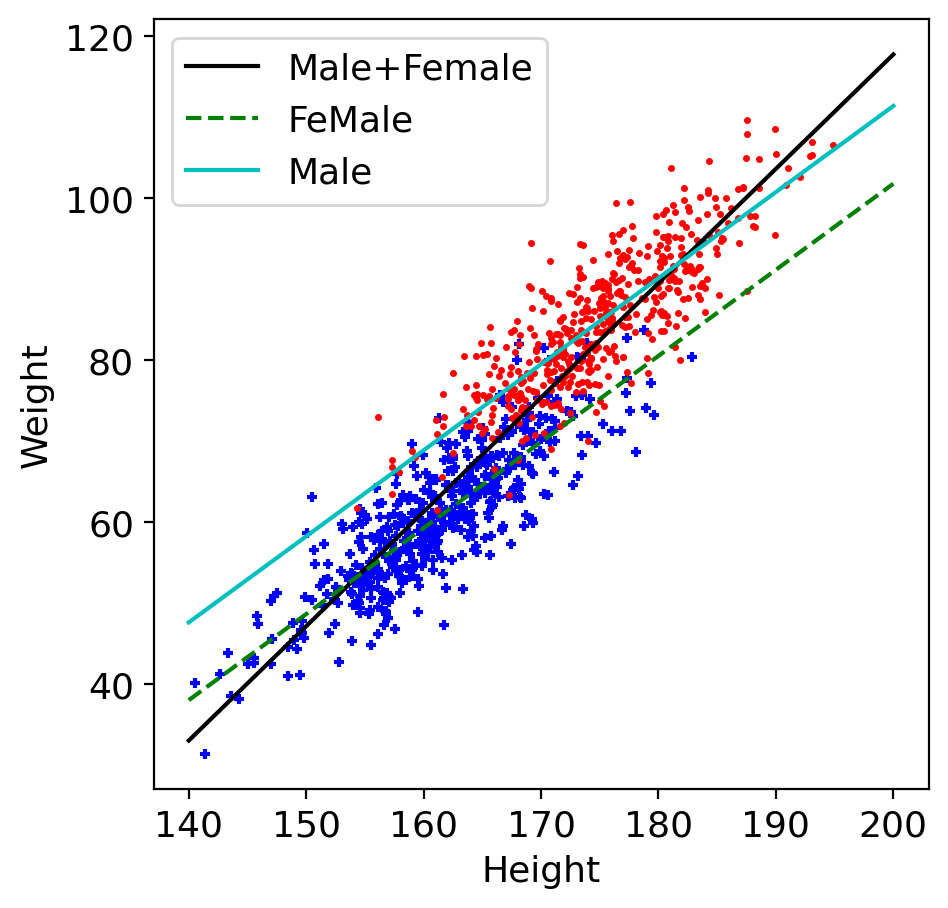

In [18]:
## 선형 회귀 직선 그리기 (성별을 추가한 경우)

# 학습된 가중치(파라미터) 보기
a1, a2 = model.coef_[0], model.coef_[1]
b1 = model.intercept_
print('a1, a2, b1 =',np.array((a1, a2, b)).round(3))

# 훈련 데이터의 산포도 보기
plt.scatter(df.Height[df.Gender==0],df.Weight[df.Gender==0],
            marker='+', s=13, color='b')
plt.scatter(df.Height[df.Gender==1],df.Weight[df.Gender==1],
            marker='.', s=9, color='r')
plt.xlabel('Height')
plt.ylabel('Weight')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
xs = np.linspace(140,200,2)  # 양 끝점
ys = a*xs + b
plt.plot(xs, ys, c='k', label='Male+Female') # 검정색

# 남성의 경우 회귀 직선 (Gender=0 으로 고정)
ys = a1*0 + a2*xs + b1
plt.plot(xs, ys, 'g--', label='FeMale')      # 파란색

# 여성의 경우 회귀 직선 (Gender=1 로 고정)
ys = a1*1 + a2*xs + b1
plt.plot(xs, ys, c='c', label='Male')     # 붉은색
plt.legend()

In [26]:
X = df2[["Gender_0", "Gender_1", "Height"]]
y = df.Weight

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test).round(4)

0.8991

In [27]:
print(model.coef_)
print(model.intercept_)

[ 5.05676136 -5.05676136  1.03358549]
-101.10506964016308


a1, a2, a3, b1 = [   5.057   -5.057    1.034 -164.787]


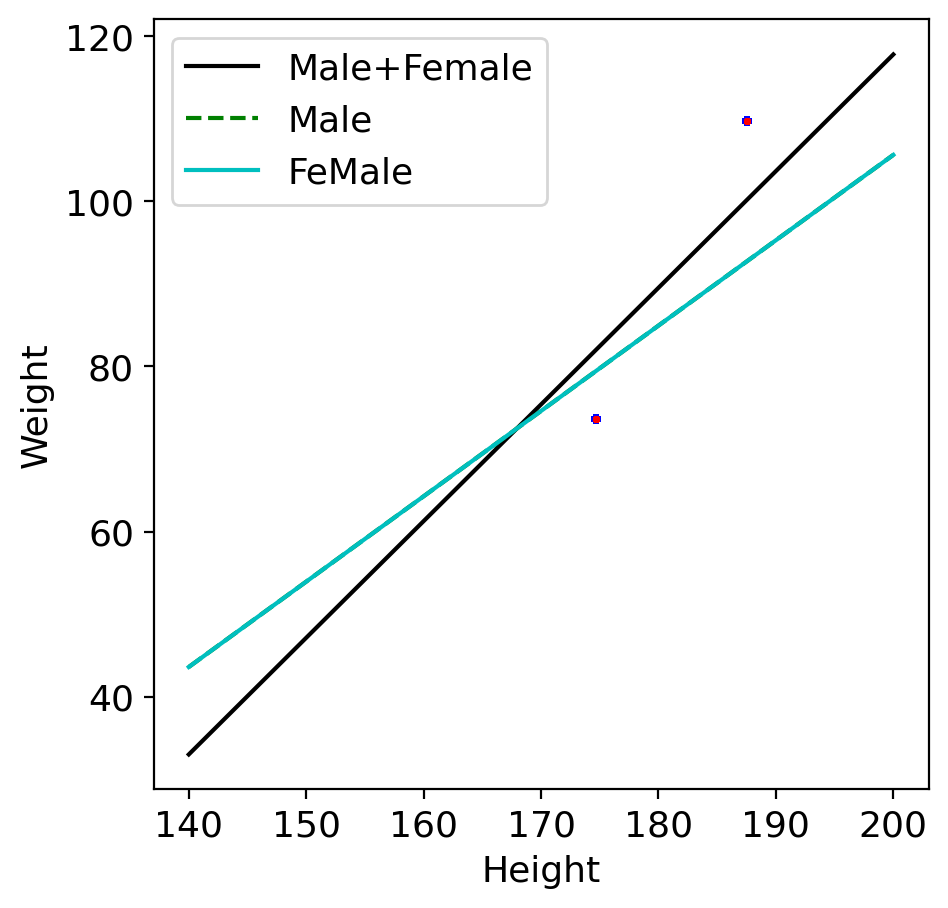

In [37]:
a1, a2, a3 = model.coef_[0], model.coef_[1], model.coef_[2]
b1 = model.intercept_
print('a1, a2, a3, b1 =',np.array((a1, a2, a3, b)).round(3))

# 훈련 데이터의 산포도 보기
plt.scatter(df2.Height[df2.Gender_0],df2.Weight[df2.Gender_0],
            marker='+', s=13, color='b')
plt.scatter(df2.Height[df2.Gender_1],df2.Weight[df2.Gender_1],
            marker='.', s=9, color='r')
plt.xlabel('Height')
plt.ylabel('Weight')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
xs = np.linspace(140,200,2)  # 양 끝점
ys = a*xs + b
plt.plot(xs, ys, c='k', label='Male+Female') # 검정색

# 남성의 경우 회귀 직선 (Gender=0 으로 고정)
ys = a1*xs + a2*xs + a3*xs + b1
plt.plot(xs, ys, 'g--', label='Male')      # 파란색

# 여성의 경우 회귀 직선 (Gender=1 로 고정)
ys = a1*xs + a2*xs + a3*xs + b1
plt.plot(xs, ys, c='c', label='FeMale')     # 붉은색
plt.legend()